# Telegram Sentiment Analysis

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import time as t
from configparser import ConfigParser
config = ConfigParser()
import asyncio
import nest_asyncio
nest_asyncio.apply()

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
# sns.set_style('white')
plt.style.use('fivethirtyeight')

from tqdm import tqdm
tqdm.pandas()

# Sentiment Analysis Library
import telegramscraping
import datapreprocessing
import sentimentscoring

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
# Setting configuration values
config.read('/Users/pauldoan/Documents/Token Metrics/1 Admin/telegram_credentials.ini')

api_id = config['Telegram']['api_id']
api_hash = config['Telegram']['api_hash']
phone = config['Telegram']['phone']
username = config['Telegram']['username']

from telethon import TelegramClient
from telethon.errors import SessionPasswordNeededError

# Create the client and connect
client = TelegramClient(username, api_id, api_hash)
await client.start()
print("Client successfully created.")
# Ensure you're authorized
if not await client.is_user_authorized():
    client.send_code_request(phone)
    try:
        client.sign_in(phone, input('Enter the code: '))
    except SessionPasswordNeededError:
        client.sign_in(password=input('Password: '))

Client successfully created.


## Retrieving telegram group id from Token Metrics db

In [3]:
channel = telegramscraping.find_tm_group('Chainlink')

Telegram group found: chainlinkofficial


## Getting channel messages


In [4]:
data = asyncio.run(telegramscraping.scrape_telegram_messages(channel, client, limit_msgs=20000))

Getting messages data for telegram group: chainlinkofficial ...
Current Offset ID is: 202205 ; Total Messages: 1000
Current Offset ID is: 199899 ; Total Messages: 2000
Current Offset ID is: 197673 ; Total Messages: 3000
Current Offset ID is: 195343 ; Total Messages: 4000
Current Offset ID is: 192893 ; Total Messages: 5000
Current Offset ID is: 190439 ; Total Messages: 6000
Current Offset ID is: 187973 ; Total Messages: 7000
Current Offset ID is: 186663 ; Total Messages: 8000
Current Offset ID is: 184406 ; Total Messages: 9000
Current Offset ID is: 182231 ; Total Messages: 10000
Current Offset ID is: 180257 ; Total Messages: 11000
Current Offset ID is: 177837 ; Total Messages: 12000
Current Offset ID is: 175228 ; Total Messages: 13000
Current Offset ID is: 173041 ; Total Messages: 14000
Current Offset ID is: 170661 ; Total Messages: 15000
Current Offset ID is: 168671 ; Total Messages: 16000
Current Offset ID is: 165741 ; Total Messages: 17000
Current Offset ID is: 162855 ; Total Message

In [5]:
data = datapreprocessing.preprocess_telegram(data)
data.head()

Detecting url only messages...


100%|██████████| 19258/19258 [00:00<00:00, 331059.60it/s]


Cleaning text...


100%|██████████| 18414/18414 [00:00<00:00, 137492.70it/s]


Remaining data: 87 %

Done.


,id,post_author,date,text,day
0,204906,NaN,2020-09-04 16:24:15+00:00,I might not be able to help with hackatoon but...,2020-09-04
1,204904,NaN,2020-09-04 16:17:04+00:00,Hello community 👋,2020-09-04
2,204902,NaN,2020-09-04 16:02:17+00:00,I think a central bank using chainlink would b...,2020-09-04
3,204901,NaN,2020-09-04 16:01:43+00:00,Defi taking over,2020-09-04
4,204899,NaN,2020-09-04 16:01:37+00:00,"sorry, wrong chat :(",2020-09-04


## Importing prices form Token Metrics db

In [6]:
# Importing price data for the coin
##########################
get_price_info = True
coin_symbol = 'LINK'
##########################

if get_price_info:
    prices = sentimentscoring.get_price_data(coin_symbol)

Price data retrieved.


### Sentiment

In [7]:
# Extracting sentiment of tweets
sentiment_data = sentimentscoring.get_sentiment(data)

Computing sentiment with Textblob...


100%|██████████| 17496/17496 [00:03<00:00, 5417.79it/s]


Computing sentiment with Vader...


100%|██████████| 17496/17496 [00:02<00:00, 6831.26it/s]

Done.


### Visualization of some tweets

In [ ]:
########################
nb_to_print = 10
########################

print('Worst messages:\n')
sentimentscoring.print_worse(sentiment_data, nb_to_print)
print('\n--------\nBest messages:\n')
sentimentscoring.print_best(sentiment_data, nb_to_print)

### Visualization - Simple moving average

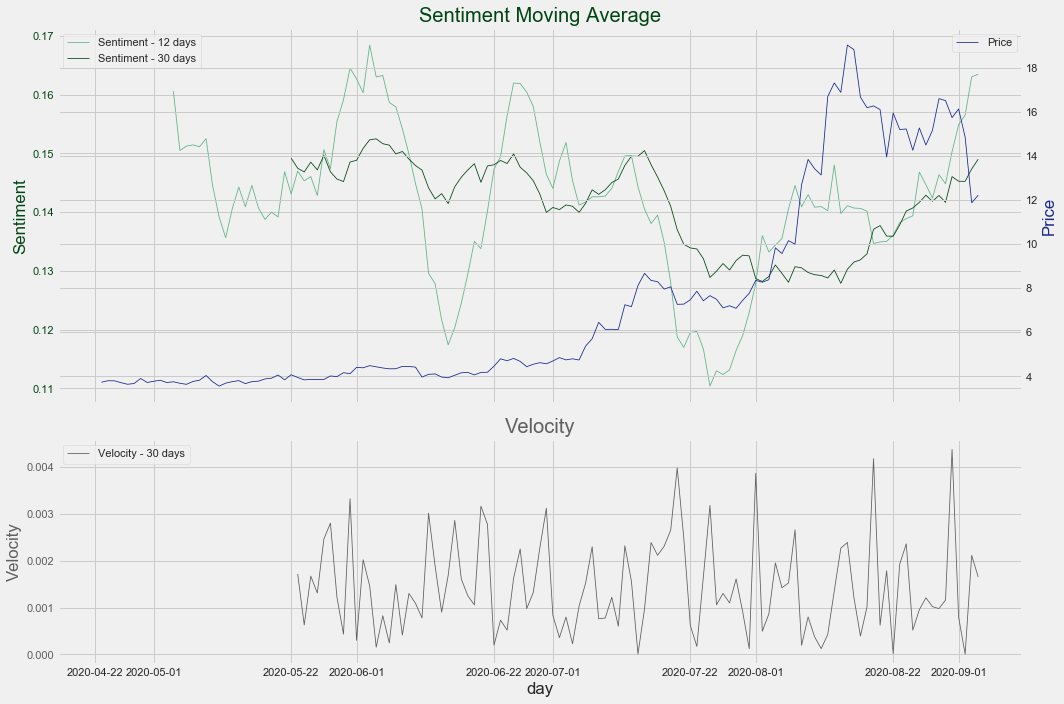

In [8]:
sentimentscoring.plot_simple_moving_average(sentiment_data, price_data=prices)

### Visualization - Weighted Moving Average

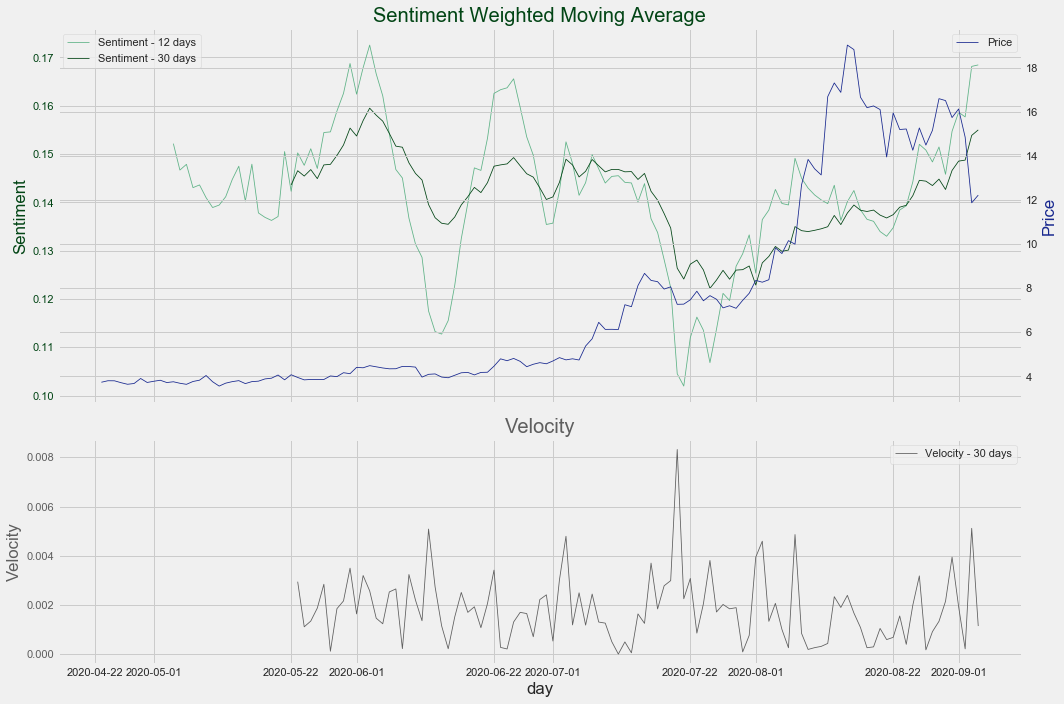

In [9]:
sentimentscoring.plot_weighted_moving_average(sentiment_data, price_data=prices)

### Visualization - Exponential Moving Average

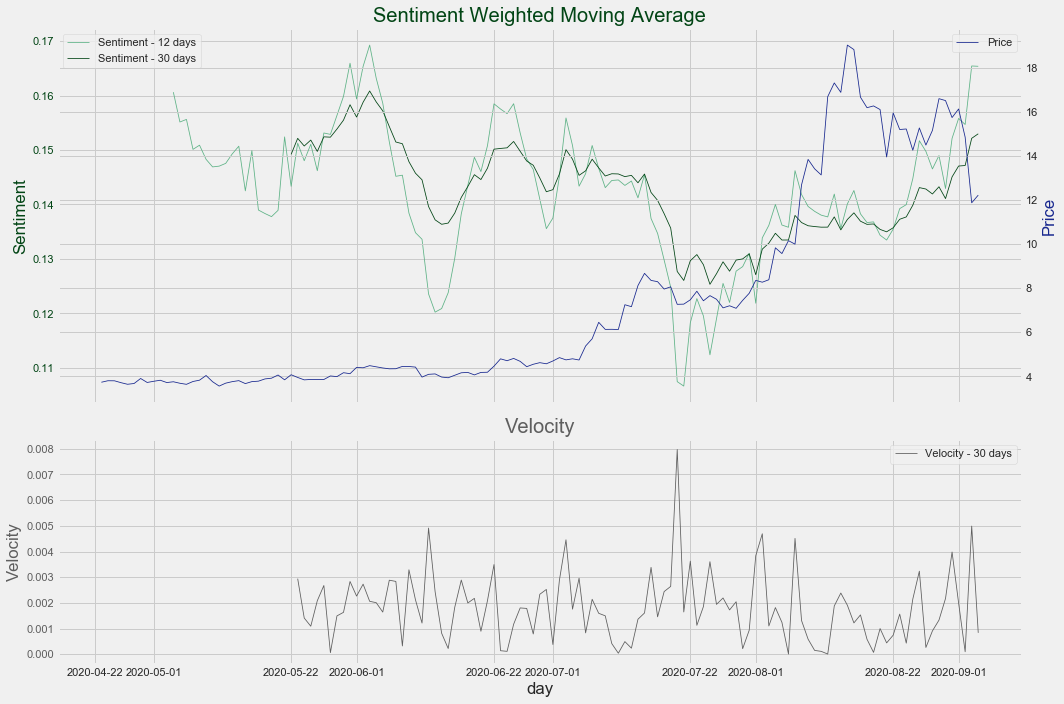

In [10]:
sentimentscoring.plot_exp_moving_average(sentiment_data, price_data=prices)